In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
palette = 'colorblind'
import seaborn as sns; sns.set_palette(palette); sns.set_color_codes(palette)

#### Code 5.1

In [2]:
# load data
d = pd.read_csv('Data/WaffleDivorce.csv', sep=';')
# standardize predictor
d['MedianAgeMarriage_s'] = (d.MedianAgeMarriage - d.MedianAgeMarriage.mean()) / d.MedianAgeMarriage.std()

In [3]:
with pm.Model() as model_5_1:
    a = pm.Normal('a', mu=10, sd=10)
    bA = pm.Normal('bA', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    # good (default) alternatives for sigma (in this and other models) are
    # sigma = pm.HalfNormal('sigma', 5)
    # sigma = pm.HalfCauchy('sigma', 5)
    # some people recomed avoiding "hard" boundaries unless they have a theoretical/data-based justification, like a correlation that is restricted to be [-1, 1].
    mu = pm.Deterministic('mu', a + bA * d.MedianAgeMarriage_s)
    Divorce = pm.Normal('Divorce', mu=mu, sd=sigma, observed=d.Divorce)
    trace_5_1 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 98.708:  19%|█▉        | 38561/200000 [00:05<00:26, 6208.35it/s]
Convergence archived at 39000
Interrupted at 39,000 [19%]: Average Loss = 100.07
100%|██████████| 1500/1500 [00:01<00:00, 907.85it/s]


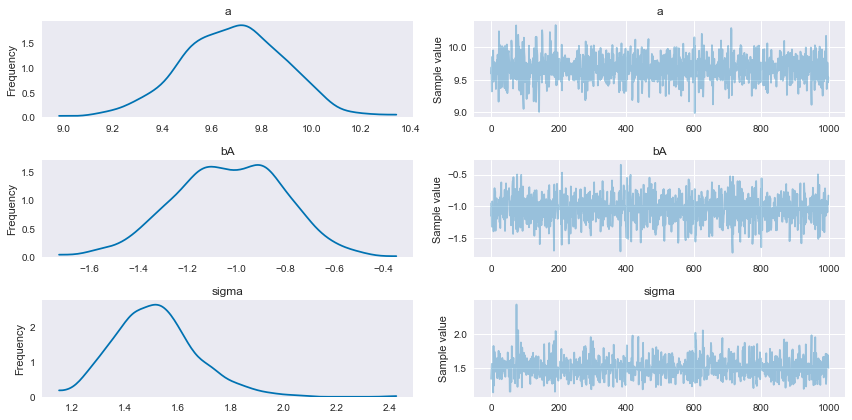

In [4]:
varnames = ['a', 'bA', 'sigma']
pm.traceplot(trace_5_1, varnames);

#### Code 5.2

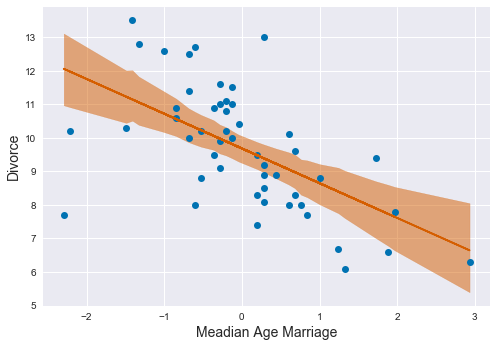

In [5]:
mu_mean = trace_5_1['mu']
mu_hpd = pm.hpd(mu_mean)

plt.plot(d.MedianAgeMarriage_s, d.Divorce, 'bo')
plt.plot(d.MedianAgeMarriage_s, mu_mean.mean(0), 'r')

idx = np.argsort(d.MedianAgeMarriage_s)
plt.fill_between(d.MedianAgeMarriage_s[idx], mu_hpd[:,0][idx], mu_hpd[:,1][idx], color='r', alpha=0.5)

plt.xlabel('Meadian Age Marriage', fontsize=14)
plt.ylabel('Divorce', fontsize=14);

##### Code 5.3

In [6]:
d['Marriage_s'] = (d.Marriage - d.Marriage.mean()) / d.Marriage.std()

In [7]:
with pm.Model() as model_5_2:
    a = pm.Normal('a', mu=10, sd=10)
    bA = pm.Normal('bA', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + bA * d.Marriage_s)
    Divorce = pm.Normal('Divorce', mu=mu, sd=sigma, observed=d.Divorce)
    trace_5_2 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 105.19:  30%|██▉       | 59474/200000 [00:08<00:20, 6728.50it/s]
Convergence archived at 60000
Interrupted at 60,000 [30%]: Average Loss = 105.89
100%|██████████| 1500/1500 [00:01<00:00, 914.50it/s] 


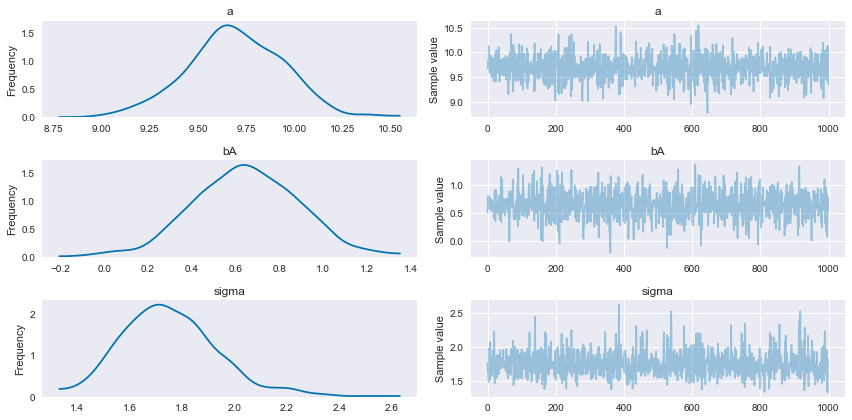

In [8]:
pm.traceplot(trace_5_2, varnames);

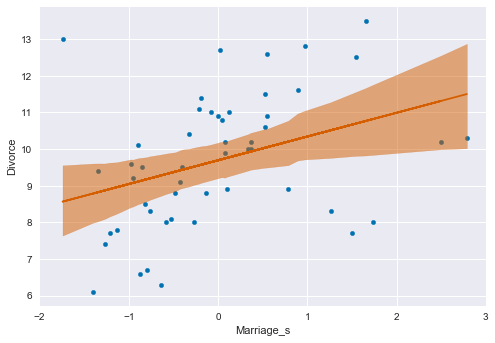

In [9]:
mu_mean = trace_5_2['mu']
mu_hpd = pm.hpd(mu_mean)

d.plot('Marriage_s', 'Divorce', kind='scatter', xlim = (-2, 3))
plt.plot(d.Marriage_s, mu_mean.mean(0), 'r')

idx = np.argsort(d.Marriage_s)
plt.fill_between(d.Marriage_s[idx], mu_hpd[:,0][idx], mu_hpd[:,1][idx], color='r', alpha=0.5);

#### Code 5.4

In [10]:
with pm.Model() as model_5_3:
    a = pm.Normal('a', mu=10, sd=10)
    bA = pm.Normal('bA', mu=0, sd=1, shape=2)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + bA[0] * d.Marriage_s + bA[1] * d.MedianAgeMarriage_s)
    
    Divorce = pm.Normal('Divorce', mu=mu, sd=sigma, observed=d.Divorce)
    trace_5_3 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 100.16:  76%|███████▌  | 151569/200000 [00:23<00:07, 6457.72it/s]
Convergence archived at 152000
Interrupted at 152,000 [76%]: Average Loss = 100.55
100%|██████████| 1500/1500 [00:02<00:00, 633.58it/s]


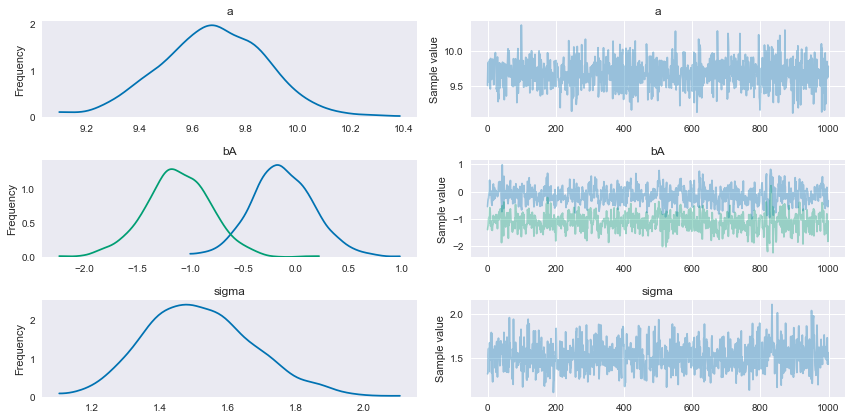

In [11]:
varnames = ['a', 'bA', 'sigma']
pm.traceplot(trace_5_3, varnames);

In [12]:
pm.df_summary(trace_5_3, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,9.677486,0.202946,0.005229,9.280050,10.068084
bA__0,-0.125297,0.296899,0.013030,-0.708290,0.466697
bA__1,-1.122544,0.311297,0.013864,-1.735350,-0.511995
sigma,1.517013,0.158050,0.005722,1.245655,1.860459


#### Code 5.5

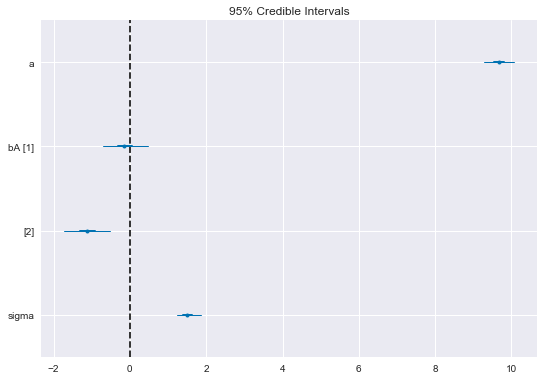

In [13]:
pm.forestplot(trace_5_3, varnames);

#### Code 5.6

In [14]:
with pm.Model() as model_5_4:
    a = pm.Normal('a', mu=10, sd=10)
    b = pm.Normal('b', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + b * d.MedianAgeMarriage_s)
    Marriage = pm.Normal('Marriage', mu=mu, sd=sigma, observed=d.Marriage_s)
    trace_5_4 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 63.828: 100%|██████████| 200000/200000 [00:29<00:00, 6746.27it/s]
Finished [100%]: Average Loss = 63.829
100%|██████████| 1500/1500 [00:01<00:00, 806.50it/s]


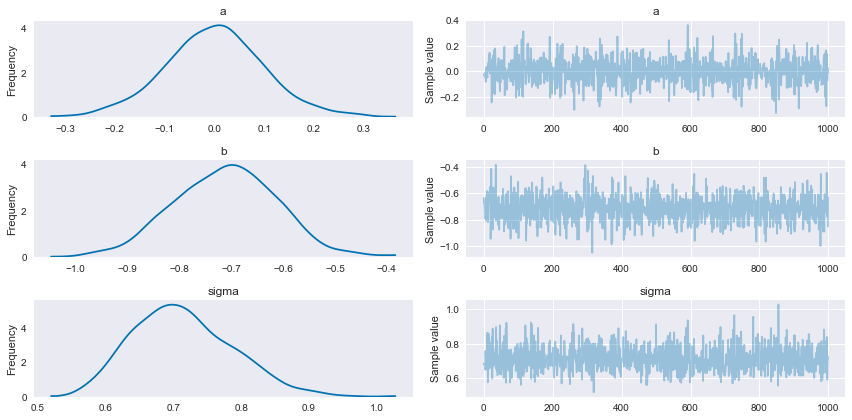

In [15]:
varnames = ['a', 'b', 'sigma']
pm.traceplot(trace_5_4, varnames);

#### Code 5.7

In [16]:
mu_pred = trace_5_4['mu'].mean(0)
residuals = d.Marriage_s - mu_pred

#### Code 5.8

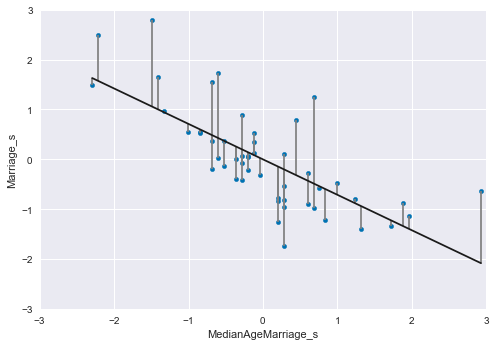

In [17]:
idx = np.argsort(d.MedianAgeMarriage_s)
d.plot('MedianAgeMarriage_s', 'Marriage_s', kind='scatter', xlim = (-3, 3), ylim = (-3, 3))
plt.plot(d.MedianAgeMarriage_s[idx], mu_pred[idx], 'k')
plt.vlines(d.MedianAgeMarriage_s, mu_pred, mu_pred + residuals, colors='grey');

#### Code 5.9

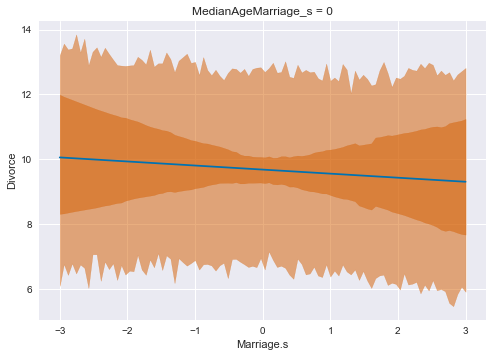

In [18]:
R_avg = np.linspace(-3, 3, 100)

mu_pred = trace_5_3['a'] + trace_5_3['bA'][:,0] * R_avg[:,None]
mu_hpd = pm.hpd(mu_pred.T)
divorce_hpd = pm.hpd(stats.norm.rvs(mu_pred, trace_5_3['sigma']).T)

plt.plot(R_avg, mu_pred.mean(1), 'b');
plt.fill_between(R_avg, mu_hpd[:,0], mu_hpd[:,1], color='r', alpha=0.5)
plt.fill_between(R_avg, divorce_hpd[:,0], divorce_hpd[:,1], color='r', alpha=0.5)

plt.xlabel('Marriage.s')
plt.ylabel('Divorce')
plt.title('MedianAgeMarriage_s = 0');

#### Code 5.10

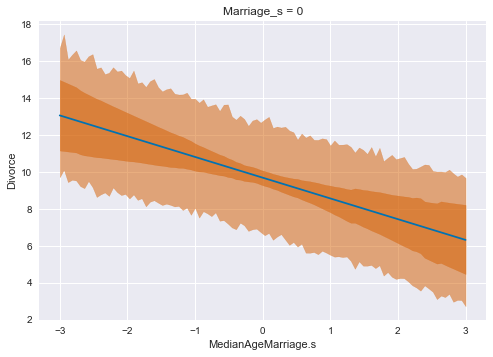

In [19]:
R_avg = np.linspace(-3, 3, 100)

mu_pred = trace_5_3['a'] + trace_5_3['bA'][:,1] * R_avg[:,None]
mu_hpd = pm.hpd(mu_pred.T)
divorce_hpd = pm.hpd(stats.norm.rvs(mu_pred, trace_5_3['sigma']).T)


plt.plot(R_avg, mu_pred.mean(1), 'b');
plt.fill_between(R_avg, mu_hpd[:,0], mu_hpd[:,1], color='r', alpha=0.5)
plt.fill_between(R_avg, divorce_hpd[:,0], divorce_hpd[:,1], color='r', alpha=0.5)

plt.xlabel('MedianAgeMarriage.s')
plt.ylabel('Divorce')
plt.title('Marriage_s = 0');

#### Code 5.11

In [20]:
mu_pred = trace_5_3['mu']
mu_hpd = pm.hpd(mu_pred)

with model_5_3:
    divorce_pred = pm.sample_ppc(trace_5_3,
                                 samples=1000)['Divorce']

    
divorce_hpd = pm.hpd(divorce_pred)

100%|██████████| 1000/1000 [00:39<00:00, 26.09it/s]


#### Code 5.12

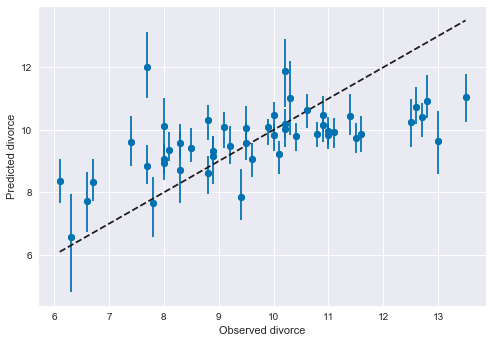

In [21]:
mu_hpd = pm.hpd(mu_pred, alpha=0.05)
plt.errorbar(d.Divorce, divorce_pred.mean(0), yerr=np.abs(divorce_pred.mean(0)-mu_hpd.T) , fmt='bo')
plt.plot(d.Divorce, divorce_pred.mean(0), 'bo')

plt.xlabel('Observed divorce')
plt.ylabel('Predicted divorce')

min_x, max_x = d.Divorce.min(), d.Divorce.max()
plt.plot([min_x, max_x], [min_x, max_x], 'k--');

#### Code 5.14

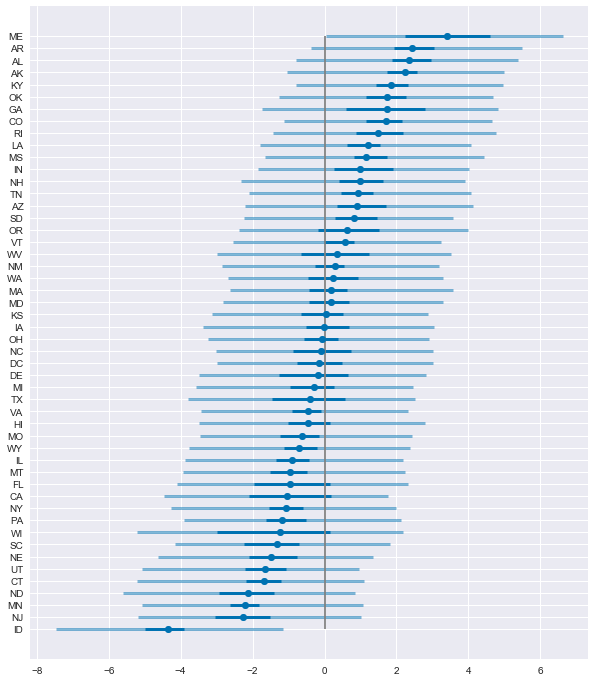

In [22]:
plt.figure(figsize=(10,12))
residuals = d.Divorce - mu_pred.mean(0)
idx = np.argsort(residuals)
y_label = d.Loc[idx]
y_points = np.linspace(0, 1, 50)
plt.errorbar(residuals[idx], y_points, 
             xerr=np.abs(divorce_pred.mean(0)-mu_hpd.T),
             fmt='bo',lw=3)

plt.errorbar(residuals[idx], y_points, 
             xerr=np.abs(divorce_pred.mean(0)-divorce_hpd.T),
             fmt='bo', lw=3, alpha=0.5)

plt.yticks(y_points, y_label);
plt.vlines(0, 0, 1, 'grey');

#### Code 5.15

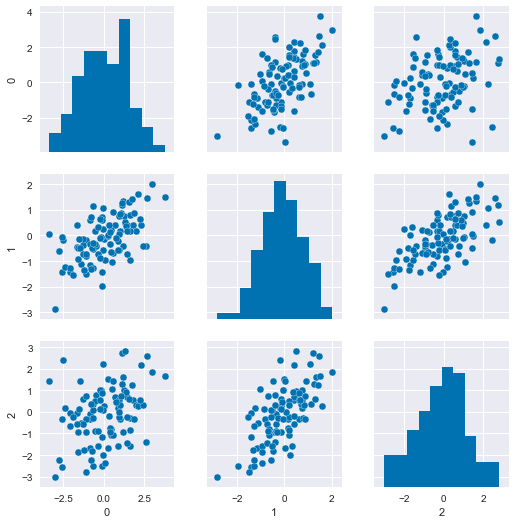

In [23]:
N = 100
x_real = stats.norm.rvs(size=N)
x_spur = stats.norm.rvs(x_real)
y = stats.norm.rvs(x_real)
d = pd.DataFrame([y, x_real, x_spur]).T

sns.pairplot(d);

#### Code 5.16

In [24]:
d = pd.read_csv('Data/milk.csv', sep=';')
d.head()

,clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc
0,Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16
1,Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NaN
2,Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NaN
3,Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NaN
4,Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NaN


#### Code 5.17 to 5.20

In [25]:
dcc = d.dropna().copy()

In [26]:
with pm.Model() as model_5_5:
    a = pm.Normal('a', mu=10, sd=100)
    bn = pm.Normal('bn', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=1)
    mu = pm.Deterministic('mu', a + bn * dcc['neocortex.perc'])
    kcal = pm.Normal('kcal', mu=mu, sd=sigma, observed=dcc['kcal.per.g'])
    trace_5_5 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 11.942:  60%|██████    | 120466/200000 [00:18<00:11, 6664.80it/s]
Convergence archived at 121000
Interrupted at 121,000 [60%]: Average Loss = 1,131.5
100%|██████████| 1500/1500 [00:06<00:00, 238.18it/s]


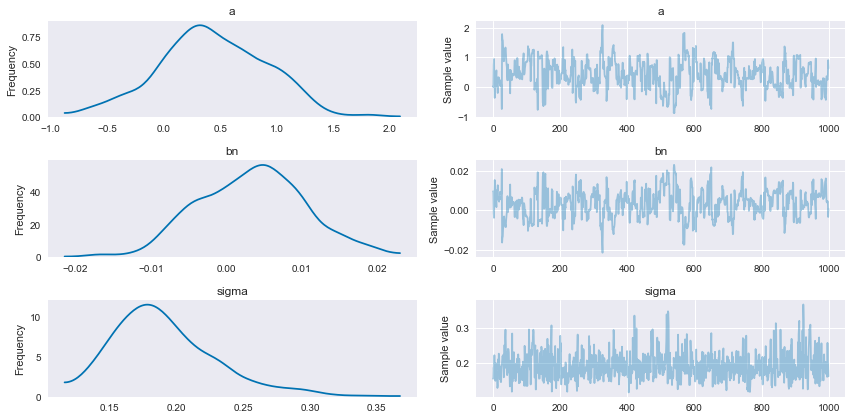

In [27]:
varnames = ['a', 'bn', 'sigma']
pm.traceplot(trace_5_5, varnames);

#### Code 5.21

In [28]:
pm.df_summary(trace_5_5, varnames).round(3)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,0.434,0.479,0.033,-0.499,1.333
bn,0.003,0.007,0.000,-0.010,0.017
sigma,0.192,0.039,0.002,0.125,0.275


#### Code 5.22

In [29]:
trace_5_5['bn'].mean() * (76 - 55)

0.069496051773171905

#### Code 5.23

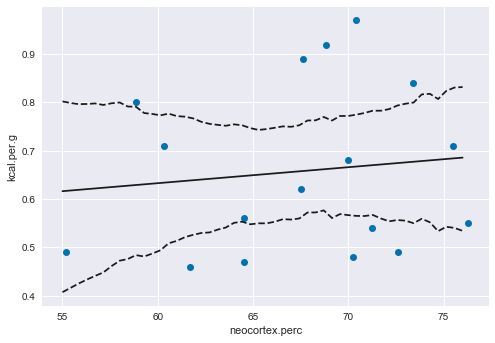

In [30]:
seq = np.linspace(55, 76, 50)
mu_pred = trace_5_5['a'] + trace_5_5['bn'] * seq[:,None]
mu_hpd = pm.hpd(mu_pred.T)

plt.plot(d['neocortex.perc'], d['kcal.per.g'], 'bo')

plt.plot(seq, mu_pred.mean(1), 'k')
plt.plot(seq, mu_hpd[:,0], 'k--')
plt.plot(seq, mu_hpd[:,1], 'k--')

plt.xlabel('neocortex.perc')
plt.ylabel('kcal.per.g');

#### Code 5.24

In [31]:
dcc['log_mass'] = np.log(dcc['mass'])

#### Code 5.25

In [32]:
with pm.Model() as model_5_6:
    a = pm.Normal('a', mu=10, sd=100)
    bn = pm.Normal('bn', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=1)
    mu = pm.Deterministic('mu', a + bn * dcc['log_mass'])
    kcal = pm.Normal('kcal', mu=mu, sd=sigma, observed=dcc['kcal.per.g'])
    trace_5_6 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 7.187:  31%|███       | 61367/200000 [00:08<00:18, 7557.43it/s] 
Convergence archived at 62000
Interrupted at 62,000 [31%]: Average Loss = 116.01
100%|██████████| 1500/1500 [00:02<00:00, 746.40it/s]


In [33]:
pm.df_summary(trace_5_6, varnames).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,0.70,0.06,0.0,0.59,0.83
bn,-0.03,0.03,0.0,-0.08,0.02
sigma,0.18,0.04,0.0,0.12,0.26


#### Code 5.26

In [34]:
with pm.Model() as model_5_7:
    a = pm.Normal('a', mu=10, sd=100)
    bn = pm.Normal('bn', mu=0, sd=1, shape=2)
    sigma = pm.Uniform('sigma', lower=0, upper=1)
    mu = pm.Deterministic('mu', a + bn[0] * dcc['neocortex.perc'] + bn[1] * dcc['log_mass'])
    kcal = pm.Normal('kcal', mu=mu, sd=sigma, observed=dcc['kcal.per.g'])
    trace_5_7 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 11.582:  90%|████████▉ | 179753/200000 [00:27<00:03, 6493.62it/s]
Convergence archived at 180000
Interrupted at 180,000 [90%]: Average Loss = 767.99
100%|██████████| 1500/1500 [00:08<00:00, 174.77it/s]


In [35]:
pm.df_summary(trace_5_7, varnames).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,-1.09,0.54,0.04,-2.22,-0.15
bn__0,0.03,0.01,0.00,0.01,0.04
bn__1,-0.10,0.03,0.00,-0.14,-0.04
sigma,0.14,0.03,0.00,0.10,0.19


#### Code 5.27

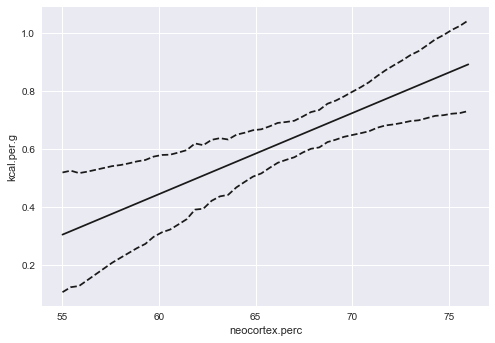

In [36]:
seq = np.linspace(55, 76, 50)
mu_pred = trace_5_7['a'] + trace_5_7['bn'][:,0] * seq[:,None] + trace_5_7['bn'][:,1] * dcc['log_mass'].mean()
mu_hpd = pm.hpd(mu_pred.T)

plt.plot(seq, mu_pred.mean(1), 'k')
plt.plot(seq, mu_hpd[:,0], 'k--')
plt.plot(seq, mu_hpd[:,1], 'k--')

plt.xlabel('neocortex.perc')
plt.ylabel('kcal.per.g');

#### Code 5.28

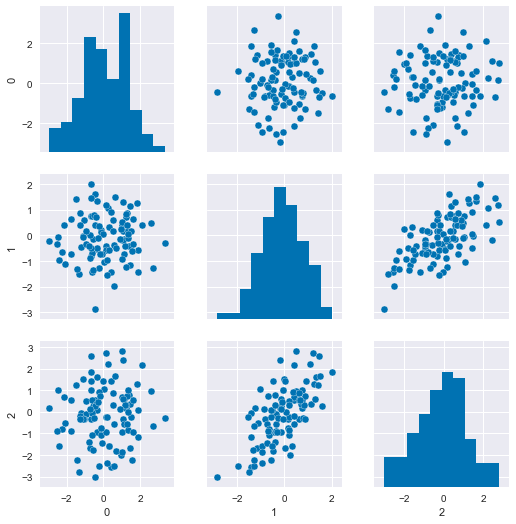

In [37]:
N = 100
rho = 0.7
x_pos = stats.norm.rvs(size=N)
x_neg = stats.norm.rvs(rho*x_pos, (1-rho**2)**0.5)
y = stats.norm.rvs(x_pos - x_neg)
d = pd.DataFrame([y, x_real, x_spur]).T

sns.pairplot(d);

#### Code 5.29

In [38]:
N = 100
height = stats.norm.rvs(size=N, loc=10, scale=2)
leg_prop = stats.uniform.rvs(size=N, loc=0.4, scale=0.5) 
leg_left = leg_prop * height + stats.norm.rvs(size=N, loc=0, scale=0.02)
leg_right = leg_prop * height + stats.norm.rvs(size=N, loc=0, scale=0.02)
d = pd.DataFrame([height,leg_left,leg_right])
d

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,8.394181,11.567711,8.311124,11.918323,11.657002,13.962597,9.193519,12.122257,10.322452,13.928751,...,12.224282,11.006713,9.214156,9.690425,12.135837,10.690364,10.099237,8.795794,7.380234,7.420027
1,5.271419,7.652234,6.719903,8.385874,9.695975,7.339568,7.626227,10.428684,5.225426,7.883132,...,5.617201,8.829416,4.895493,6.014047,9.526939,9.159501,6.839209,3.487652,4.665876,6.502579
2,5.255980,7.629046,6.652133,8.362424,9.720828,7.356962,7.689086,10.426313,5.257121,7.874069,...,5.587892,8.861794,4.947554,6.022132,9.528572,9.094715,6.843300,3.513365,4.708315,6.499278


#### Code 5.30

In [39]:
with pm.Model() as m5_8:
    a = pm.Normal('a',mu = 10, sd=100)
    bl = pm.Normal('bl',mu=2, sd= 10)
    br = pm.Normal('br',mu=2, sd= 10)
    mu = pm.Deterministic('mu',a + bl * leg_left + br * leg_right)    
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    height = pm.Normal('height',mu=mu, sd=sigma, observed=d)
    trace_5_8 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 618.42:  15%|█▌        | 30898/200000 [00:05<00:28, 5910.15it/s]
Convergence archived at 31000
Interrupted at 31,000 [15%]: Average Loss = 976.19
100%|██████████| 1500/1500 [01:03<00:00, 18.48it/s]/home/osvaldo/anaconda3/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:255: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % chain)



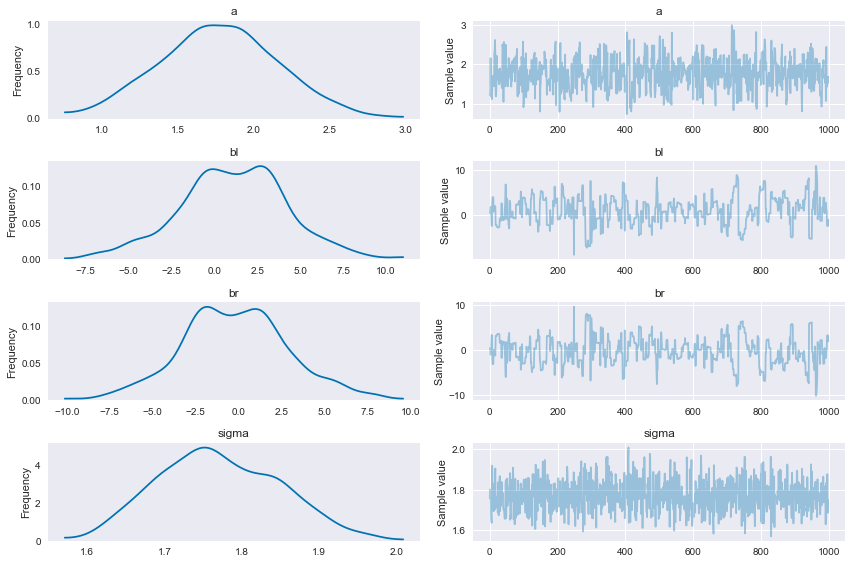

In [40]:
varnames=['a', 'bl', 'br', 'sigma']
pm.traceplot(trace_5_8, varnames);

#### Code 5.31

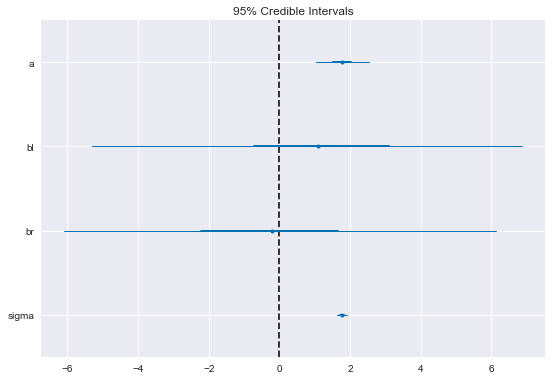

In [41]:
pm.forestplot(trace_5_8, varnames);

#### Code 5.32

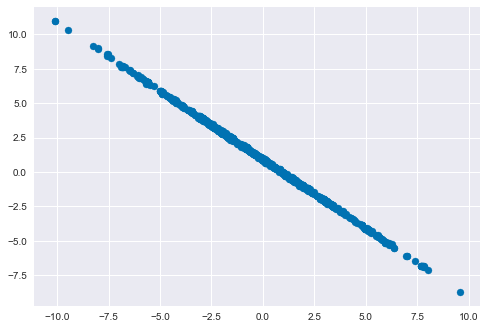

In [42]:
plt.scatter(trace_5_8['br'], trace_5_8['bl']);

#### Code 5.33

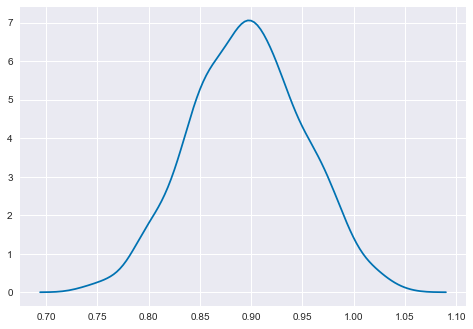

In [43]:
sum_blbr = trace_5_8['br'] + trace_5_8['bl']
sns.kdeplot(sum_blbr);

#### Code 5.34

In [44]:
with pm.Model() as m5_9:
    a = pm.Normal('a',mu = 10, sd=100)
    bl = pm.Normal('bl',mu=2, sd= 10)
    mu = pm.Deterministic('mu',a + bl * leg_left)    
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    height = pm.Normal('height',mu=mu, sd=sigma, observed=d)
    trace_5_9 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 611.9:  13%|█▎        | 25357/200000 [00:04<00:27, 6440.13it/s] 
Convergence archived at 26000
Interrupted at 26,000 [13%]: Average Loss = 777.03
100%|██████████| 1500/1500 [00:03<00:00, 438.01it/s]


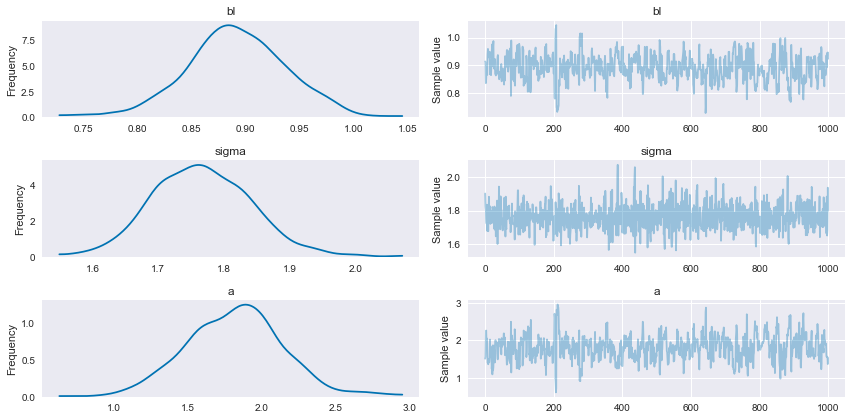

In [45]:
varnames_1 = ['bl', 'sigma', 'a']
pm.traceplot(trace_5_9, varnames_1);

#### Code 5.35

In [46]:
milk = pd.read_csv('Data/milk.csv', sep=';')
milk.head()

,clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc
0,Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16
1,Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NaN
2,Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NaN
3,Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NaN
4,Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NaN


#### Code 5.36

In [47]:
with pm.Model() as m5_10:
    a = pm.Normal('a',mu = 0.6, sd=10)
    bf = pm.Normal('bf',mu=0, sd= 1)
    mu = pm.Deterministic('mu',a + bf * milk['perc.fat'])    
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    kcalperg = pm.Normal('kcal.per.g',mu=mu, sd=sigma, observed=milk['kcal.per.g'])
    trace_5_10 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -13.572:  36%|███▌      | 71730/200000 [00:10<00:18, 7052.20it/s]
Convergence archived at 72000
Interrupted at 72,000 [36%]: Average Loss = 17.044
100%|██████████| 1500/1500 [00:02<00:00, 517.27it/s]


In [48]:
varnames = ['a', 'bf', 'sigma']
pm.df_summary(trace_5_10, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,0.298845,0.040654,0.002414,0.220438,0.377691
bf,0.010081,0.001091,0.000065,0.008216,0.012393
sigma,0.080099,0.012444,0.000441,0.057380,0.105217


In [49]:
with pm.Model() as m5_11:
    a = pm.Normal('a',mu = 0.6, sd=10)
    bl = pm.Normal('bl',mu=0, sd= 1)
    mu = pm.Deterministic('mu',a + bl * milk['perc.lactose'])    
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    kcalperg = pm.Normal('kcal.per.g',mu=mu, sd=sigma, observed=milk['kcal.per.g'])
    trace_5_11 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -16.859:  18%|█▊        | 35937/200000 [00:05<00:23, 6866.17it/s]
Convergence archived at 36000
Interrupted at 36,000 [18%]: Average Loss = 69.342
100%|██████████| 1500/1500 [00:03<00:00, 462.76it/s]


In [50]:
varnames = ['a', 'bl', 'sigma']
pm.df_summary(trace_5_11, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,1.167891,0.047778,0.003165,1.089023,1.263085
bl,-0.010596,0.000930,0.000061,-0.012365,-0.008949
sigma,0.067468,0.009858,0.000345,0.049210,0.087517


#### Code 5.37

In [51]:
with pm.Model() as m5_12:
    a = pm.Normal('a',mu = 0.6, sd=10)
    bf = pm.Normal('bf',mu=0, sd= 1)
    bl = pm.Normal('bl',mu=0, sd= 1)
    mu = pm.Deterministic('mu',a + bf * milk['perc.fat'] + bl * milk['perc.lactose'])    
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    kcalperg = pm.Normal('kcal.per.g',mu=mu, sd=sigma, observed=milk['kcal.per.g'])
    trace_5_12 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -8.9011: 100%|██████████| 200000/200000 [00:30<00:00, 6650.14it/s]
Finished [100%]: Average Loss = -8.8716
100%|██████████| 1500/1500 [00:08<00:00, 185.02it/s]


In [52]:
varnames = ['a', 'bf', 'bl', 'sigma']
pm.df_summary(trace_5_12, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,1.027251,0.227032,0.015174,0.593798,1.448604
bf,0.001672,0.002741,0.000183,-0.003621,0.006622
bl,-0.008925,0.002770,0.000183,-0.015029,-0.004250
sigma,0.067515,0.009561,0.000321,0.049175,0.086903


#### Code 5.38

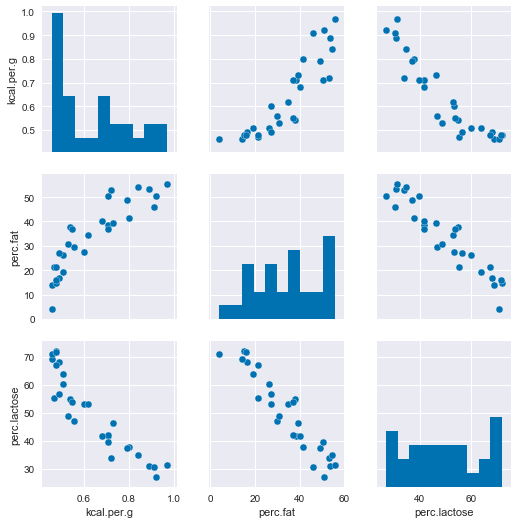

In [53]:
df = milk[['kcal.per.g','perc.fat','perc.lactose']]
sns.pairplot(df);

#### Code 5.39

In [54]:
milk.corr()['perc.fat']['perc.lactose']

-0.94163734568392821

#### Code 5.40

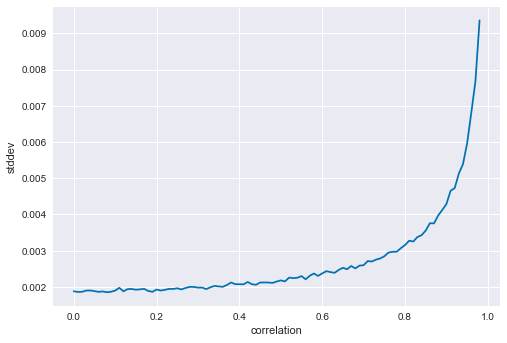

In [55]:
def simcoll(r = 0.9):
    milk['x'] = stats.norm.rvs(size=len(milk), loc = r * milk['perc.fat'],
                       scale = np.sqrt((1 - r**2) * milk['perc.fat'].var()))
    X = np.column_stack((milk['perc.fat'], milk['x']))
    m = sm.OLS(milk['kcal.per.g'], X).fit()
    cov = m.cov_params()
    return (np.diag(cov)[1])**0.5
    
def repsimcoll(r= 0.9, N = 100):
    stddev = [simcoll(r) for _ in range(N)]

    return np.mean(stddev)
    

lista = []
for i in np.arange(start = 0, stop = 0.99, step = 0.01):   
    lista.append(repsimcoll (r= i, N = 100))

plt.plot(np.arange(start = 0, stop = 0.99, step = 0.01), lista)
plt.xlabel('correlation')
plt.ylabel('stddev')

#### Code 5.41

In [56]:
# number of plants
N = 100

# simulate initial heights
h0 = stats.norm.rvs(size = N, loc = 10, scale = 2)

# assign treatments and simulate fungus and growth
treatment = np.repeat([0, 1], [N/2]*2)
fungus = np.random.binomial(n=1, p=(0.5-treatment * 0.4), size=N)
h1 = h0 + stats.norm.rvs(size= N, loc= 5- 3*fungus, scale=1)

# compose a clean data frame
d = pd.DataFrame({'h0': h0,
                  'h1': h1,
                  'Treatment':treatment,
                  'Fungus': fungus})

#### Code 5.42

In [57]:
with pm.Model() as m5_13:
    a = pm.Normal('a',mu = 0, sd=100)
    bh = pm.Normal('bh',mu = 0, sd=10)
    bt = pm.Normal('bt',mu = 0, sd=10)
    bf = pm.Normal('bf',mu = 0, sd=10)
    mu = pm.Deterministic('mu',a + bh * h0 + bt * treatment + bf * fungus)
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    h1 = pm.Normal('h1', mu = mu, sd=sigma, observed = d['h1'].get_values())
    trace_5_13 = pm.sample(1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 164.01:  20%|██        | 40522/200000 [00:06<00:24, 6637.77it/s]
Convergence archived at 41000
Interrupted at 41,000 [20%]: Average Loss = 204.78
100%|██████████| 1500/1500 [00:04<00:00, 313.12it/s]


In [58]:
varnames = ['a', 'bh', 'bt', 'bf', 'sigma']
pm.df_summary(trace_5_13, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,5.015307,0.535922,0.037225,4.053364,6.152382
bh,1.032670,0.051021,0.003567,0.936090,1.131297
bt,-0.354841,0.214856,0.007647,-0.797047,0.035565
bf,-3.742796,0.226268,0.007508,-4.191692,-3.320551
sigma,0.993696,0.071990,0.002128,0.867618,1.153002


#### Code 5.43

In [59]:
with pm.Model() as m5_14:
    a = pm.Normal('a',mu = 0, sd=100)
    bh = pm.Normal('bh',mu = 0, sd=10)
    bt = pm.Normal('bt',mu = 0, sd=10)
    mu = pm.Deterministic('mu',a + bh * h0 + bt * treatment)
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    h1 = pm.Normal('h1', mu = mu, sd=sigma, observed =d['h1'])
    trace_5_14 = pm.sample(1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 222.33:  28%|██▊       | 55481/200000 [00:08<00:20, 6919.34it/s]
Convergence archived at 56000
Interrupted at 56,000 [28%]: Average Loss = 241.47
100%|██████████| 1500/1500 [00:03<00:00, 385.39it/s]


In [60]:
varnames = ['a', 'bh', 'bt', 'sigma']
pm.df_summary(trace_5_14, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,4.140648,1.000342,0.070089,2.373566,6.139195
bh,0.932753,0.096154,0.006745,0.762442,1.116112
bt,1.069657,0.368148,0.013702,0.383753,1.829815
sigma,1.885800,0.142659,0.004058,1.647634,2.188009


#### Code 5.44

In [61]:
d = pd.read_csv('Data/Howell1.csv', sep=';')
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


#### Code 5.45

In [62]:
with pm.Model() as m5_15:
    a = pm.Normal('a',mu = 178, sd=100)
    bm = pm.Normal('bm',mu = 0, sd=10)
    mu = pm.Deterministic('mu',a + bm * d['male'])
    sigma = pm.Uniform('sigma', lower= 0 , upper= 50)
    height = pm.Normal('height', mu = mu, sd=sigma, observed = d['height'])
    trace_5_15 = pm.sample(1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 2,580.8:  55%|█████▌    | 110736/200000 [00:16<00:16, 5326.71it/s]
Convergence archived at 111000
Interrupted at 111,000 [55%]: Average Loss = 2,633.8
100%|██████████| 1500/1500 [00:02<00:00, 712.84it/s]


In [63]:
varnames = ['a', 'bm', 'sigma']
pm.df_summary(trace_5_15, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,134.915058,1.598363,0.066979,132.078813,138.279419
bm,7.199049,2.291888,0.093030,2.340845,11.108514
sigma,27.418723,0.830023,0.020837,25.860382,29.009389


#### Code 5.46

In [64]:
mu.male = trace_5_15['a'] + trace_5_15['bm']
pm.hpd(mu.male)

array([ 138.91245205,  145.50257993])

#### Code 5.47

In [65]:
with pm.Model() as m5_15b:
    af = pm.Normal('af',mu = 178, sd=100)
    am = pm.Normal('am',mu = 178, sd=100)
    mu = pm.Deterministic('mu',af * (1 - d['male']) + am * d['male'])
    sigma = pm.Uniform('sigma', lower= 0 , upper= 50)
    height = pm.Normal('height', mu = mu, sd=sigma, observed = d['height'])
    trace_5_15b = pm.sample(1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 2,582.6:  30%|██▉       | 59566/200000 [00:10<00:23, 6027.82it/s]
Convergence archived at 60000
Interrupted at 60,000 [30%]: Average Loss = 2,691.1
100%|██████████| 1500/1500 [00:02<00:00, 708.15it/s]


#### Code 5.48

In [66]:
d = pd.read_csv('Data/milk.csv', sep=';')
d = d.drop_duplicates()

#### Code 5.49

In [67]:
d['clade.NWM'] = np.where( d['clade'] == 'New World Monkey', 1, 0)
d['clade.NWM'].get_values()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

#### Code 5.50

In [68]:
d['clade.OWM'] = np.where( d['clade'] == 'Old World Monkey', 1, 0)
d['clade.S'] = np.where( d['clade'] == 'Strepsirrhine', 1, 0)

#### Code 5.51

In [69]:
with pm.Model() as m5_16:
    a = pm.Normal('a', mu = 0.6, sd=10)
    b_NWM = pm.Normal('b_NWM',mu = 0, sd=1)
    b_OWM = pm.Normal('b_OWM',mu = 0, sd=1)
    b_S = pm.Normal('b_S',mu = 0, sd=1)
    mu = pm.Deterministic('mu', a + 
                          b_NWM * d['clade.NWM'] + 
                          b_OWM * d['clade.OWM'] +
                          b_S * d['clade.S'])

    mu_ape = pm.Deterministic('mu_ape', a + 0)
    mu_NWM = pm.Deterministic('mu_NWM', a + b_NWM)
    mu_OWM = pm.Deterministic('mu_OWM', a + b_OWM)
    mu_S =  pm.Deterministic('mu_S', a + b_S)
    
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    kcal_per_g = pm.Normal('kcal_per_g', mu = mu, sd=sigma, observed = d['kcal.per.g'])
    trace_5_16 = pm.sample(1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -0.86281: 100%|██████████| 200000/200000 [00:33<00:00, 6031.65it/s]
Finished [100%]: Average Loss = -0.86253
100%|██████████| 1500/1500 [00:03<00:00, 412.56it/s]


In [70]:
varnames = ['a', 'b_NWM', 'b_OWM', 'b_S', 'sigma']
pm.df_summary(trace_5_16, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,0.547654,0.044787,0.001952,0.466576,0.638740
b_NWM,0.165653,0.062174,0.002581,0.032132,0.277268
b_OWM,0.241505,0.069669,0.002853,0.089076,0.357684
b_S,-0.039083,0.074715,0.002747,-0.180234,0.110014
sigma,0.129928,0.019529,0.000584,0.097058,0.171373


#### Code 5.52

In [71]:
varnames = ['mu_ape', 'mu_NWM', 'b_OWM', 'b_S']
pm.df_summary(trace_5_16, varnames)[['mean', 'sd', 'hpd_2.5', 'hpd_97.5']]

,mean,sd,hpd_2.5,hpd_97.5
mu_ape,0.547654,0.044787,0.466576,0.638740
mu_NWM,0.713307,0.042920,0.626430,0.799440
b_OWM,0.241505,0.069669,0.089076,0.357684
b_S,-0.039083,0.074715,-0.180234,0.110014


#### Code 5.53

In [72]:
diff_NMW_OWM = trace_5_16['mu_NWM'] - trace_5_16['mu_OWM']
np.percentile(diff_NMW_OWM, 2.5), np.percentile(diff_NMW_OWM, 50), np.percentile(diff_NMW_OWM, 97.5)

(-0.21345962183474015, -0.074364045254460553, 0.050625135724233446)

#### Code 5.54

In [73]:
z = pd.Categorical(d['clade'])
d['clade_id'] = z.codes

#### Code 5.55

In [74]:
with pm.Model() as m5_16_alt:
    a = pm.Normal('a',mu = 0.6, sd=10)
    mu = pm.Deterministic('mu', a)
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    kcal_per_g = pm.Normal('kcal_per_g', mu = mu, sd=sigma, observed = d['kcal.per.g'])
    trace_5_16_alt = pm.sample(1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -1.1994:   8%|▊         | 16921/200000 [00:02<00:24, 7463.64it/s]  
Convergence archived at 17000
Interrupted at 17,000 [8%]: Average Loss = 13.831
100%|██████████| 1500/1500 [00:01<00:00, 1043.19it/s]


In [75]:
#varnames = ['mu_ape', 'mu_NWM', 'b_OWM', 'b_S']
pm.df_summary(trace_5_16_alt)#, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,0.642869,0.032079,0.001134,0.581753,0.704899
mu,0.642869,0.032079,0.001134,0.581753,0.704899
sigma,0.168717,0.023405,0.000806,0.126056,0.214425


#### Code 5.56

#### Code 5.57

#### Code 5.58

#### Code 5.59

#### Code 5.x

#### Code 5.x

#### Code 5.x

#### Code 5.x

#### Code 5.x

#### Code 5.x

In [76]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nPandas %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, pd.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

This notebook was createad on a computer x86_64 running debian stretch/sid and using:
Python 3.5.3
IPython 6.0.0
PyMC3 3.1rc3
NumPy 1.11.3
Pandas 0.19.0
SciPy 0.19.0
Matplotlib 2.0.2
Seaborn 0.7.1

